In [1]:
import random
import json

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import svm
from sklearn import tree
from sklearn import neighbors

from lightgbm import LGBMRegressor, Dataset

In [2]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
import warnings; warnings.simplefilter('ignore')

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
def plot_predict(y_true, y_pred):
    slope, intercept,r_value, p_value, std_err = stats.linregress(y_true, y_pred)
    line = slope*y_true+intercept
    plt.scatter(y_true, y_pred)
    plt.plot(y_true, line, color = 'red')
    plt.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()], color='black', lw=0.5)
    plt.xlabel('observed')
    plt.ylabel('predicted')
    plt.grid(True)

In [6]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [7]:
def RMSE(y_true, y_pred):
    return np.sqrt(MSE(y_true, y_pred))

In [8]:
def R2(y_true, y_pred):
    return  1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [9]:
data = pd.read_csv('./csv/data_norm.csv')

In [10]:
data.head()

,0_S2_B01,0_S2_B02,0_S2_B03,0_S2_B04,0_S2_B05,0_S2_B06,0_S2_B07,0_S2_B08,0_S2_B8A,0_S2_B09,0_S2_B10,0_S2_B11,0_S2_B12,1_S2_B01,1_S2_B02,1_S2_B03,1_S2_B04,1_S2_B05,1_S2_B06,1_S2_B07,1_S2_B08,1_S2_B8A,1_S2_B09,1_S2_B10,1_S2_B11,1_S2_B12,2_S2_B01,2_S2_B02,2_S2_B03,2_S2_B04,2_S2_B05,2_S2_B06,2_S2_B07,2_S2_B08,2_S2_B8A,2_S2_B09,2_S2_B10,2_S2_B11,2_S2_B12,3_S2_B01,3_S2_B02,3_S2_B03,3_S2_B04,3_S2_B05,3_S2_B06,3_S2_B07,3_S2_B08,3_S2_B8A,3_S2_B09,3_S2_B10,3_S2_B11,3_S2_B12,4_S2_B01,4_S2_B02,4_S2_B03,4_S2_B04,4_S2_B05,4_S2_B06,4_S2_B07,4_S2_B08,4_S2_B8A,4_S2_B09,4_S2_B10,4_S2_B11,4_S2_B12,5_S2_B01,5_S2_B02,5_S2_B03,5_S2_B04,5_S2_B05,5_S2_B06,5_S2_B07,5_S2_B08,5_S2_B8A,5_S2_B09,5_S2_B10,5_S2_B11,5_S2_B12,6_S2_B01,6_S2_B02,6_S2_B03,6_S2_B04,6_S2_B05,6_S2_B06,6_S2_B07,6_S2_B08,6_S2_B8A,6_S2_B09,6_S2_B10,6_S2_B11,6_S2_B12,7_S2_B01,7_S2_B02,7_S2_B03,7_S2_B04,7_S2_B05,7_S2_B06,7_S2_B07,7_S2_B08,7_S2_B8A,7_S2_B09,7_S2_B10,7_S2_B11,7_S2_B12,8_S2_B01,8_S2_B02,8_S2_B03,8_S2_B04,8_S2_B05,8_S2_B06,8_S2_B07,8_S2_B08,8_S2_B8A,8_S2_B09,8_S2_B10,8_S2_B11,8_S2_B12,9_S2_B01,9_S2_B02,9_S2_B03,9_S2_B04,9_S2_B05,9_S2_B06,9_S2_B07,9_S2_B08,9_S2_B8A,9_S2_B09,9_S2_B10,9_S2_B11,9_S2_B12,10_S2_B01,10_S2_B02,10_S2_B03,10_S2_B04,10_S2_B05,10_S2_B06,10_S2_B07,10_S2_B08,10_S2_B8A,10_S2_B09,10_S2_B10,10_S2_B11,10_S2_B12,11_S2_B01,11_S2_B02,11_S2_B03,11_S2_B04,11_S2_B05,11_S2_B06,11_S2_B07,11_S2_B08,11_S2_B8A,11_S2_B09,11_S2_B10,11_S2_B11,11_S2_B12,Field_ID,Yield,Year,0_NDVI,1_NDVI,2_NDVI,3_NDVI,4_NDVI,5_NDVI,6_NDVI,7_NDVI,8_NDVI,9_NDVI,10_NDVI,11_NDVI,0_ATSAVI,1_ATSAVI,2_ATSAVI,3_ATSAVI,4_ATSAVI,5_ATSAVI,6_ATSAVI,7_ATSAVI,8_ATSAVI,9_ATSAVI,10_ATSAVI,11_ATSAVI,0_ARVI2,1_ARVI2,2_ARVI2,3_ARVI2,4_ARVI2,5_ARVI2,6_ARVI2,7_ARVI2,8_ARVI2,9_ARVI2,10_ARVI2,11_ARVI2,0_CIrededge,1_CIrededge,2_CIrededge,3_CIrededge,4_CIrededge,5_CIrededge,6_CIrededge,7_CIrededge,8_CIrededge,9_CIrededge,10_CIrededge,11_CIrededge,0_GARI,1_GARI,2_GARI,3_GARI,4_GARI,5_GARI,6_GARI,7_GARI,8_GARI,9_GARI,10_GARI,11_GARI,0_CVI,1_CVI,2_CVI,3_CVI,4_CVI,5_CVI,6_CVI,7_CVI,8_CVI,9_CVI,10_CVI,11_CVI,0_LCI,1_LCI,2_LCI,3_LCI,4_LCI,5_LCI,6_LCI,7_LCI,8_LCI,9_LCI,10_LCI,11_LCI,0_MVI,1_MVI,2_MVI,3_MVI,4_MVI,5_MVI,6_MVI,...,9_LCI_MEAN,9_LCI_MAX,9_MVI_MIN,9_MVI_MEAN,9_MVI_MAX,9_mARI_MIN,9_mARI_MEAN,9_mARI_MAX,9_NDRE_MIN,9_NDRE_MEAN,9_NDRE_MAX,9_CLIM_aet_MIN,9_CLIM_aet_MEAN,9_CLIM_aet_MAX,9_CLIM_pet_MIN,9_CLIM_pet_MEAN,9_CLIM_pet_MAX,9_CLIM_pr_MIN,9_CLIM_pr_MEAN,9_CLIM_pr_MAX,9_CLIM_soil_MIN,9_CLIM_soil_MEAN,9_CLIM_soil_MAX,9_CLIM_srad_MIN,9_CLIM_srad_MEAN,9_CLIM_srad_MAX,9_CLIM_tmmn_MIN,9_CLIM_tmmn_MEAN,9_CLIM_tmmn_MAX,9_CLIM_tmmx_MIN,9_CLIM_tmmx_MEAN,9_CLIM_tmmx_MAX,9_CLIM_vap_MIN,9_CLIM_vap_MEAN,9_CLIM_vap_MAX,9_CLIM_vpd_MIN,9_CLIM_vpd_MEAN,9_CLIM_vpd_MAX,9_CLIM_vs_MIN,9_CLIM_vs_MEAN,9_CLIM_vs_MAX,10_S2_B01_MIN,10_S2_B01_MEAN,10_S2_B01_MAX,10_S2_B02_MIN,10_S2_B02_MEAN,10_S2_B02_MAX,10_S2_B03_MIN,10_S2_B03_MEAN,10_S2_B03_MAX,10_S2_B04_MIN,10_S2_B04_MEAN,10_S2_B04_MAX,10_S2_B05_MIN,10_S2_B05_MEAN,10_S2_B05_MAX,10_S2_B06_MIN,10_S2_B06_MEAN,10_S2_B06_MAX,10_S2_B07_MIN,10_S2_B07_MEAN,10_S2_B07_MAX,10_S2_B08_MIN,10_S2_B08_MEAN,10_S2_B08_MAX,10_S2_B8A_MIN,10_S2_B8A_MEAN,10_S2_B8A_MAX,10_S2_B09_MIN,10_S2_B09_MEAN,10_S2_B09_MAX,10_S2_B10_MIN,10_S2_B10_MEAN,10_S2_B10_MAX,10_S2_B11_MIN,10_S2_B11_MEAN,10_S2_B11_MAX,10_S2_B12_MIN,10_S2_B12_MEAN,10_S2_B12_MAX,10_NDVI_MIN,10_NDVI_MEAN,10_NDVI_MAX,10_ATSAVI_MIN,10_ATSAVI_MEAN,10_ATSAVI_MAX,10_ARVI2_MIN,10_ARVI2_MEAN,10_ARVI2_MAX,10_GARI_MIN,10_GARI_MEAN,10_GARI_MAX,10_CIrededge_MIN,10_CIrededge_MEAN,10_CIrededge_MAX,10_CVI_MIN,10_CVI_MEAN,10_CVI_MAX,10_LCI_MIN,10_LCI_MEAN,10_LCI_MAX,10_MVI_MIN,10_MVI_MEAN,10_MVI_MAX,10_mARI_MIN,10_mARI_MEAN,10_mARI_MAX,10_NDRE_MIN,10_NDRE_MEAN,10_NDRE_MAX,10_CLIM_aet_MIN,10_CLIM_aet_MEAN,10_CLIM_aet_MAX,10_CLIM_pet_MIN,10_CLIM_pet_MEAN,10_CLIM_pet_MAX,10_CLIM_pr_MIN,10_CLIM_pr_MEAN,10_CLIM_pr_MAX,10_CLIM_soil_MIN,10_CLIM_soil_MEAN,10_CLIM_soil_MAX,10_CLIM_srad_MIN,10_CLIM_srad_MEAN,10_CLIM_srad_MAX,10_CLIM_tmmn_MIN,10_CLIM_tmmn_MEAN,10_CLIM_tmmn_MAX

Baseline for model

In [11]:
'dataset mean {:.3f} dataset RMSE {:.3f}'.format(data.Yield.mean(), RMSE(data.Yield.mean(), data.Yield))

'dataset mean 3.216 dataset RMSE 1.722'

In [12]:
# load dict of features groups
with open("./csv/features_groups.json", "r") as read_file:
    features_dict = json.load(read_file)
features_dict.keys()

dict_keys(['const', 'monthly', 'min', 'mean', 'max', 'corr_features'])

In [13]:
def find_stat_features(features, month):
    stat_features = [feature for feature in features if int(feature.split('_')[0])==month]
    return(stat_features)

In [14]:
stat_features = find_stat_features(features_dict['min']+features_dict['max']+features_dict['mean'], 11)

In [15]:
f_list = features_dict['const']+features_dict['monthly'] + stat_features

In [16]:
len(f_list)

554

In [17]:
data[f_list] = data[f_list].fillna(data[f_list].mean())

In [18]:
# load dict of ids for splitting 
with open("./csv/split.json", "r") as read_file:
    split = json.load(read_file)
split.keys()

dict_keys(['train_ids', 'test_ids', 'year_split'])

In [19]:
def make_train_valid(df, features, train_idx, valid_idx, test_idx):    
    
    #train/valid split
    train = df.loc[df.Field_ID.isin(train_idx)]
    valid = df.loc[df.Field_ID.isin(valid_idx)]
    test = df.loc[df.Field_ID.isin(test_idx)].sort_values(by=['Field_ID'])
    
    xTrain, yTrain = train[features].values, train['Yield'].values
    xValid, yValid = valid[features].values, valid['Yield'].values
    xTest = test[features].values
    
    return (xTrain, yTrain, xValid, yValid, xTest)

In [20]:
# test basic 
dict_classifiers = {
    
    'ridge': linear_model.Ridge(alpha=1.0),
    'linear': linear_model.LinearRegression(),
    'dt': tree.DecisionTreeRegressor(max_depth = 10, random_state = RANDOM_SEED),
    'linsvr': svm.LinearSVR(),
    'svr': svm.SVR(),
    'rf': RandomForestRegressor(n_estimators = 50, max_depth = 5, random_state = RANDOM_SEED),
    'knn': neighbors.KNeighborsRegressor(n_neighbors=5),
    'gbr': ensemble.GradientBoostingRegressor(n_estimators = 50, max_depth = 5, random_state = RANDOM_SEED)   
}

[1/8] ridge: RMSE 1.316/8.141, R2 0.412/-26.731
[2/8] linear: RMSE 1.267/39.305, R2 0.455/-948.756
[3/8] dt: RMSE 1.000/2.828, R2 0.650/-1.845
[4/8] linsvr: RMSE 1.433/10.569, R2 0.304/-38.503
[5/8] svr: RMSE 1.355/1.660, R2 0.379/0.051
[6/8] rf: RMSE 1.329/1.673, R2 0.402/0.038
[7/8] knn: RMSE 1.358/1.767, R2 0.377/-0.075
[8/8] gbr: RMSE 0.918/1.894, R2 0.712/-0.249


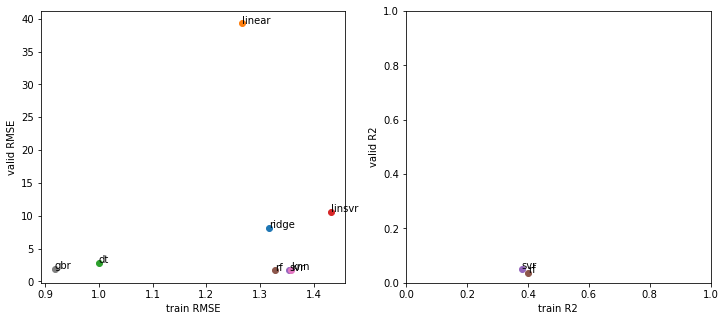

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for i, (k, model) in enumerate(dict_classifiers.items()):
    
    train_rmse_list = []
    valid_rmse_list = []
    
    train_r2_list = []
    valid_r2_list = []
    
    for f, (train_index, valid_index) in split['year_split'].items():
        
        xTrain_norm, yTrain, xValid_norm, yValid, _ = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])
        
        model.fit(xTrain_norm, yTrain)
    
        yPred_Train = model.predict(xTrain_norm)
        yPred_Valid = model.predict(xValid_norm)
    
        train_rmse_list.append(RMSE(yTrain, yPred_Train))
        valid_rmse_list.append(RMSE(yValid, yPred_Valid))
        
        train_r2_list.append(R2(yTrain, yPred_Train))
        valid_r2_list.append(R2(yValid, yPred_Valid))
                                                
    rmse_train = np.mean(train_rmse_list)
    rmse_valid = np.mean(valid_rmse_list)
    
    r2_train = np.mean(train_r2_list)
    r2_valid = np.mean(valid_r2_list)

    print('[{}/{}] {}: RMSE {:0.3f}/{:0.3f}, R2 {:0.3f}/{:0.3f}'.format(i+1, len(dict_classifiers),
                                                                          k, rmse_train, rmse_valid, r2_train, r2_valid))
    
    ax1.scatter(rmse_train, rmse_valid)
    # ax1.axhline(RMSE(box.Yield.mean(), box.Yield))
    ax1.annotate(k, (rmse_train, rmse_valid))
    ax1.set_xlabel('train RMSE')
    ax1.set_ylabel('valid RMSE')
    
    ax2.scatter(r2_train, r2_valid)
    ax2.annotate(k, (r2_train, r2_valid))
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('train R2')
    ax2.set_ylabel('valid R2')

SVR / RF are  the best models so far

# SVR

In [22]:
valid_predict_list = []
test_predict_list = []

train_rmse_list = []
valid_rmse_list = []

train_r2_list = []
valid_r2_list = []

svr = svm.SVR()

for f, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])

    svr.fit(xTrain_norm, yTrain)

    yPred_Train = svr.predict(xTrain_norm)
    yPred_Valid = svr.predict(xValid_norm)
    
    valid_predict_list.append([yValid, yPred_Valid])
    test_predict_list.append(svr.predict(xTest_norm))

    train_rmse_list.append(RMSE(yTrain, yPred_Train))
    valid_rmse_list.append(RMSE(yValid, yPred_Valid))

    train_r2_list.append(R2(yTrain, yPred_Train))
    valid_r2_list.append(R2(yValid, yPred_Valid))
    
rmse_train = np.mean(train_rmse_list)
rmse_valid = np.mean(valid_rmse_list)

r2_train = np.mean(train_r2_list)
r2_valid = np.mean(valid_r2_list)
    
print('train RMSE {:0.2f} / valid RMSE {:0.2f}'.format(rmse_train, rmse_valid))
print('train CORR {:0.2f} / valid CORR {:0.2f}'.format(r2_train, r2_valid))

train RMSE 1.35 / valid RMSE 1.66
train CORR 0.38 / valid CORR 0.05


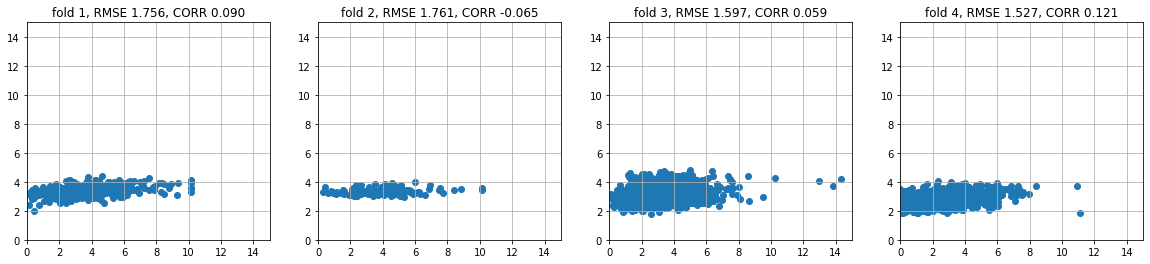

In [23]:
fig, ax = plt.subplots(1, len(valid_predict_list), figsize = (20, 4))
for f, (gt, pred) in enumerate(valid_predict_list):
    ax[f].set_title('fold {}, RMSE {:.3f}, CORR {:.3f}'.format(f+1, valid_rmse_list[f], valid_r2_list[f]))
    ax[f].scatter(gt, pred)
    ax[f].set_xlim(0, 15)
    ax[f].set_ylim(0, 15)
    ax[f].grid()

In [24]:
test_df = data.loc[data.Field_ID.isin(split['test_ids'])].sort_values(by=['Field_ID'])

In [25]:
test_df['Yield'] = np.mean(test_predict_list, axis=0)

In [26]:
test_df[['Field_ID', 'Yield']].to_csv('./predicts/Submission_SVR_const_monthly_stat.csv', index = False)
# result score - 1.808593963770017

# RF

In [27]:
valid_predict_list = []
test_predict_list = []

train_rmse_list = []
valid_rmse_list = []

train_r2_list = []
valid_r2_list = []

rf = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = RANDOM_SEED)

for f, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])

    rf.fit(xTrain_norm, yTrain)

    yPred_Train = rf.predict(xTrain_norm)
    yPred_Valid = rf.predict(xValid_norm)
    
    valid_predict_list.append([yValid, yPred_Valid])
    test_predict_list.append(rf.predict(xTest_norm))

    train_rmse_list.append(RMSE(yTrain, yPred_Train))
    valid_rmse_list.append(RMSE(yValid, yPred_Valid))

    train_r2_list.append(R2(yTrain, yPred_Train))
    valid_r2_list.append(R2(yValid, yPred_Valid))
    
rmse_train = np.mean(train_rmse_list)
rmse_valid = np.mean(valid_rmse_list)

r2_train = np.mean(train_r2_list)
r2_valid = np.mean(valid_r2_list)
    
print('train RMSE {:0.2f} / valid RMSE {:0.2f}'.format(rmse_train, rmse_valid))
print('train CORR {:0.2f} / valid CORR {:0.2f}'.format(r2_train, r2_valid))

train RMSE 1.33 / valid RMSE 1.68
train CORR 0.40 / valid CORR 0.03


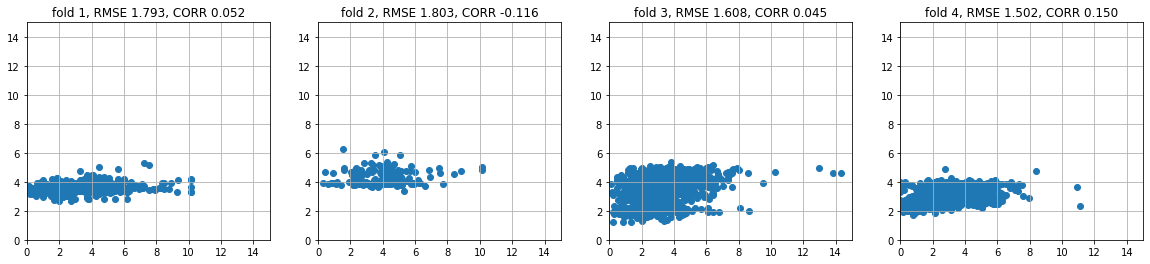

In [28]:
fig, ax = plt.subplots(1, len(valid_predict_list), figsize = (20, 4))
for f, (gt, pred) in enumerate(valid_predict_list):
    ax[f].set_title('fold {}, RMSE {:.3f}, CORR {:.3f}'.format(f+1, valid_rmse_list[f], valid_r2_list[f]))
    ax[f].scatter(gt, pred)
    ax[f].set_xlim(0, 15)
    ax[f].set_ylim(0, 15)
    ax[f].grid()

In [29]:
test_df['Yield'] = np.mean(test_predict_list, axis=0)

In [30]:
test_df[['Field_ID', 'Yield']].to_csv('./predicts/Submission_RF_monthly_stat.csv', index = False)
# result score - 1.793441802530261

# LightGBM

In [31]:
valid_predict_list = []
test_predict_list = []

train_rmse_list = []
valid_rmse_list = []

train_r2_list = []
valid_r2_list = []

feat_impot_list = []

lgbmr= LGBMRegressor(n_estimators=1000, max_depth = 5, random_state = RANDOM_SEED, silent=True)

for f, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])

    lgbmr.fit(xTrain_norm, yTrain, verbose=False, eval_metric=['mae', 'rmse'])

    yPred_Train = lgbmr.predict(xTrain_norm)
    yPred_Valid = lgbmr.predict(xValid_norm)
    
    valid_predict_list.append([yValid, yPred_Valid])
    test_predict_list.append(lgbmr.predict(xTest_norm))

    train_rmse_list.append(RMSE(yTrain, yPred_Train))
    valid_rmse_list.append(RMSE(yValid, yPred_Valid))

    train_r2_list.append(R2(yTrain, yPred_Train))
    valid_r2_list.append(R2(yValid, yPred_Valid))
    
    feat_impot_list.append(lgbmr.feature_importances_.astype(float))
    
rmse_train = np.mean(train_rmse_list)
rmse_valid = np.mean(valid_rmse_list)

r2_train = np.mean(train_r2_list)
r2_valid = np.mean(valid_r2_list)
    
print('train RMSE {:0.2f} / valid RMSE {:0.2f}'.format(rmse_train, rmse_valid))
print('train CORR {:0.2f} / valid CORR {:0.2f}'.format(r2_train, r2_valid))

train RMSE 0.15 / valid RMSE 1.73
train CORR 0.99 / valid CORR -0.03


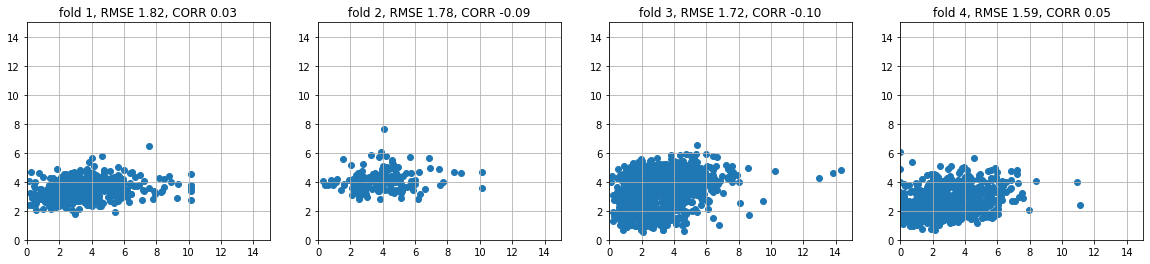

In [32]:
fig, ax = plt.subplots(1, len(valid_predict_list), figsize = (20, 4))
for f, (gt, pred) in enumerate(valid_predict_list):
    ax[f].set_title('fold {}, RMSE {:.2f}, CORR {:.2f}'.format(f+1, valid_rmse_list[f], valid_r2_list[f]))
    ax[f].scatter(gt, pred)
    ax[f].set_xlim(0, 15)
    ax[f].set_ylim(0, 15)
    ax[f].grid()

In [33]:
feat_impot_df = pd.DataFrame({
    'features':f_list,
    'importarnce': np.mean(np.array(feat_impot_list), axis=0)
})
feat_impot_df = feat_impot_df.sort_values(by=['importarnce'], ascending = False).reset_index(drop=True)

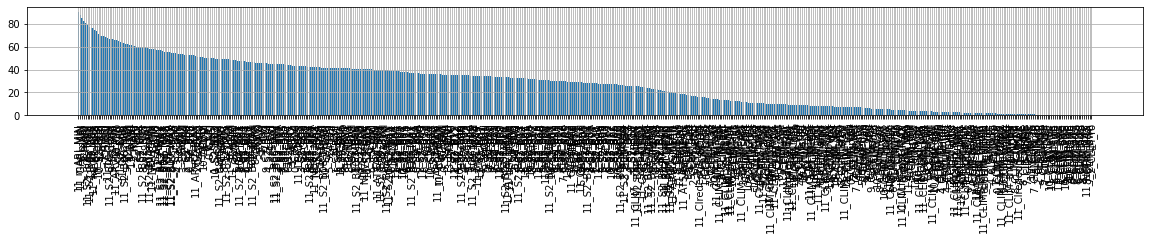

In [34]:
plt.figure(figsize = (20,2))
plt.bar(feat_impot_df.features, feat_impot_df.importarnce)
# plt.ylim(0,0.4)
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [35]:
test_df['Yield'] = np.mean(test_predict_list, axis=0)

In [36]:
test_df[['Field_ID', 'Yield']].to_csv('./predicts/Submission_LGBMR_monthly_stat.csv', index = False)
# result score - 1.790077871357966

# Catboost

In [37]:
from catboost import CatBoostRegressor, Pool, cv

In [39]:
valid_predict_list = []
test_predict_list = []

train_rmse_list = []
valid_rmse_list = []

train_r2_list = []
valid_r2_list = []

feat_impot_list = []

cb = CatBoostRegressor(loss_function='RMSE', n_estimators=1000, max_depth=5,  random_state = RANDOM_SEED, silent = False)

for f, (train_index, valid_index) in split['year_split'].items():

    xTrain_norm, yTrain, xValid_norm, yValid, xTest_norm = make_train_valid(data, f_list, train_index, valid_index, split['test_ids'])

    cb.fit(xTrain_norm, yTrain, eval_set = (xValid_norm, yValid),  verbose=False)

    yPred_Train = cb.predict(xTrain_norm)
    yPred_Valid = cb.predict(xValid_norm)
    
    valid_predict_list.append([yValid, yPred_Valid])
    test_predict_list.append(cb.predict(xTest_norm))

    train_rmse_list.append(RMSE(yTrain, yPred_Train))
    valid_rmse_list.append(RMSE(yValid, yPred_Valid))

    train_r2_list.append(R2(yTrain, yPred_Train))
    valid_r2_list.append(R2(yValid, yPred_Valid))
    
    feat_impot_list.append(cb.feature_importances_.astype(float))
    
rmse_train = np.mean(train_rmse_list)
rmse_valid = np.mean(valid_rmse_list)

r2_train = np.mean(train_r2_list)
r2_valid = np.mean(valid_r2_list)
    
print('train RMSE {:0.2f} / valid RMSE {:0.2f}'.format(rmse_train, rmse_valid))
print('train CORR {:0.2f} / valid CORR {:0.2f}'.format(r2_train, r2_valid))

train RMSE 1.31 / valid RMSE 1.61
train CORR 0.40 / valid CORR 0.11


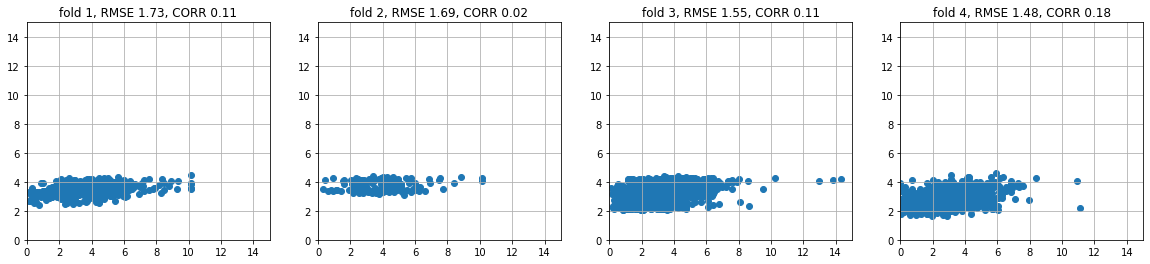

In [40]:
fig, ax = plt.subplots(1, len(valid_predict_list), figsize = (20, 4))
for f, (gt, pred) in enumerate(valid_predict_list):
    ax[f].set_title('fold {}, RMSE {:.2f}, CORR {:.2f}'.format(f+1, valid_rmse_list[f], valid_r2_list[f]))
    ax[f].scatter(gt, pred)
    ax[f].set_xlim(0, 15)
    ax[f].set_ylim(0, 15)
    ax[f].grid()

In [41]:
feat_impot_df = pd.DataFrame({
    'features':f_list,
    'importarnce': np.mean(np.array(feat_impot_list), axis=0)
})
feat_impot_df = feat_impot_df.sort_values(by=['importarnce'], ascending = False).reset_index(drop=True)

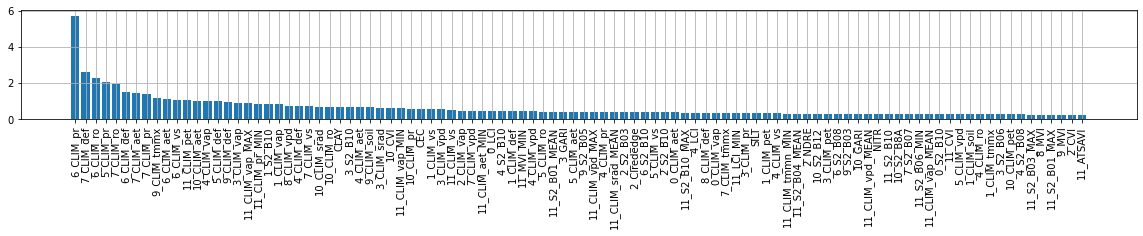

In [42]:
plt.figure(figsize = (20,2))
plt.bar(feat_impot_df.features[:100], feat_impot_df.importarnce[:100])
# plt.ylim(0,0.4)
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

In [43]:
test_df['Yield'] = np.mean(test_predict_list, axis=0)

In [44]:
test_df[['Field_ID', 'Yield']].to_csv('./predicts/Submission_CB_monthly_stat.csv', index = False)
# result score - 1.766331761828724